# <span style="color:red"> Numerical Simulation Laboratory (NSL) </span>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math

<h1><font color='ForestGreen'>ESERCITAZIONE 2: INTEGRAZIONE MC, IMPORTANCE SAMPLING E RANDOM WALK</font> </h1>

<h2><font color = 'LimeGreen'>ESERCIZIO 2.1: INTEGRAZIONE MC E IMPORTANCE  SAMPLING</font></h2>

In questa sezione si sfruttano i metodi di integrazione MC per il calcolo del seguente integrale:
<p style = 'text-align:center'>$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = \int_\Omega g(x)p(x)dx = 1$ </p>
Per farlo, in prima battuta si impieghera' il campionamento uniforme, per poi analizzare la riduzione dell'incertezza nel ricorrere 
alla tecnica dell'importance sampling: una procedura basata sull'osservazione che quanto più la densita' di propabilita' campionata e' simile alla funzione integranda, tanto più l'errore nella stima dell'integrale tendera' a ridursi.<br>
Piu' esplicitamente, dato un integrale della forma
<p style = 'text-align:center'> $\int_\Omega g(x)p(x)dx$</p> ove $p(x) \geq 0$ e $\int_{\Omega}p(x)dx = 1$
l'idea e' considerare la variabile aleatoria media <p style = 'text-align:center'>$G_N = \frac{\sum_{i=1}^{N}g_N}{N}$</p> in virtu' del fatto che $I = \langle G_N \rangle = \lim_{N \to \infty} \frac{\sum_{i=1}^{N}g_N}{N}$,
con $\epsilon = error = \frac{\sigma_I}{\sqrt N}, \sigma_I^2 = \int_\Omega g^2(x)p(x)dx - I^2$.
Prendendo a questo punto il caso di interesse per $\Omega = [a,b] $ $a = 0, b = 1 $ e 
$p(x)=\begin{cases}
    \frac{1}{b-a} & x\in [a,b]\\
    0 & altrove
\end{cases}$ 
con  e $ g(x) = \frac{\pi}{2}\cos(\pi x/2) $ , si ha che la stima dell'integrale si ottiene campionando la variabile media $G_N$ tramite
la generazione di $N$ numeri casuali distribuiti uniformemente nell'intervallo $[0,1]$.<br>
Per quanto concerne invece il metodo dell'importance sampling, il punto di partenza e' scrivere l'integrale di cui sopra nella forma come: 
<p style = 'text-align:center'>$\int_a^b \frac{g(x)p(x)}{d(x)}{d(x)}dx$</p>, ove $d(x) \geq 0$ e $\int_{\Omega}d(x)dx = 1$; fatto cio', successivamente basta osservare che, posto 
$var[I_d] = \int_a^b (\frac{g(x)p(x)}{d(x)})^2d(x)dx - I^2 $, si trova che la scelta di $d = d(x)$ che minimizza tale quantita' e' $d(x) = \lambda|g(x)p(x)|$, cioe' una distribuzione che assomigli il più possibile alla funzione integranda. Risultato dimostrabile attraverso la minimizzazione funzionale della lagrangiana $L \{ d \} = [var - \lambda(1 - \int d(x)dx]$.

<h3><font color = 'LightGreen'>Uniform Sampling</font></h3>

Come anticipato, nel primo punto dell'esercizio viene richiesto di applicare il metodo di integrazione MC tramite il campionamento
di una variabile uniforme.
In questo caso, si pone:
<p style = 'text-align:center'> $g(x) = \frac{\pi}{2}\cos(\pi x/2)$ </p>
<p style = 'text-align:center'> $p(x)=\begin{cases}
    1 & x\in [0,1]\\
    0 & altrove
\end{cases}$  </p>
Si noti che per lo studio del comportamento dell'errore si e' adoperato il metodo del data blocking. 


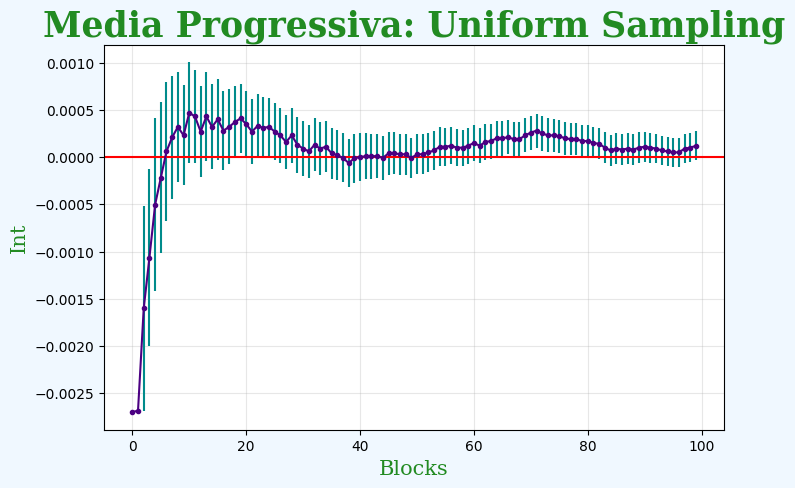

In [3]:
N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N
plt.figure(figsize=(8,5), facecolor = "AliceBlue")

x,ave, err = np.loadtxt("EX_2.1/unif.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave-1, yerr = err, color = "Indigo", ecolor = "DarkCyan", marker = ".")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.xlabel('Blocks', fontdict = font)
plt.ylabel('Int' , fontdict = font)
plt.title("Media Progressiva: Uniform Sampling", fontsize=25, color ="ForestGreen", family="serif", fontweight = "bold")

plt.grid(True, alpha = 0.3)
plt.axhline(y=0, color = 'r', linestyle = '-')

plt.show()



In [4]:
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('STIMA:  ')
print(ave[-1])
print('\nINCERTEZZA : ')
print(err[-1])
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

STIMA:  
1.00012

INCERTEZZA : 
0.000153899

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



La convergenza e' pienamente soddisfatta.

<h3><font color = 'LightGreen'>Importance Sampling </font></h3>

Per quanto riguarda invece l'applicazione dell'importance sampling, si e' semplicemente riscritto l'integrale di cui sopra nella forma:
<p style = 'text-align:center'> $\int_a^b \frac{g(x)p(x)}{d(x)}{d(x)}dx = \int_0^1 \frac{\frac{\pi}{2}\cos(\pi x/2)}{-2x+2}(-2x+2) dx $ </p>
<p style = 'text-align:center'> $d(x) = -2x + 2 $</p>
la cumulativa invece è:
<p style = 'text-align:center'> $x=1-\sqrt{1-y}$</p>
Similmente a prima, i risultati sono riportati applicando il metodo del data blocking:

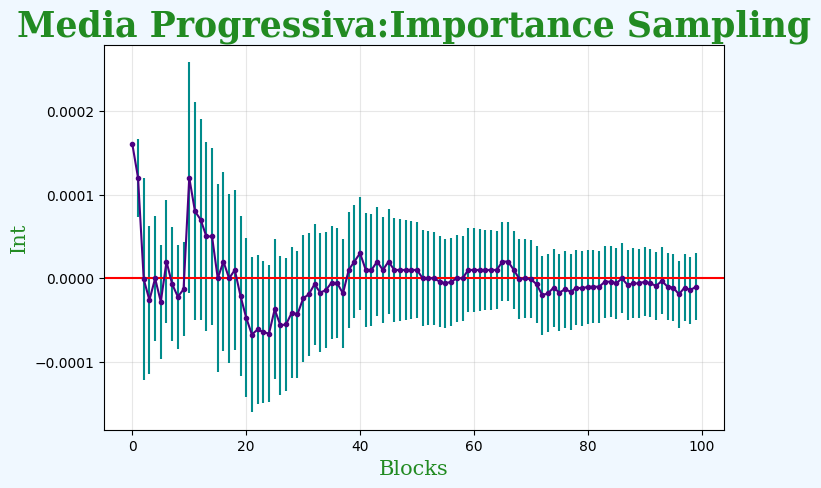

In [6]:
N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N
plt.figure(figsize=(8,5), facecolor = "AliceBlue")

x,ave_imp, err_imp = np.loadtxt("EX_2.1/imp.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave_imp-1, yerr = err_imp, color = "Indigo", ecolor = "DarkCyan", marker = ".")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
plt.xlabel('Blocks', fontdict = font)
plt.ylabel('Int' , fontdict = font)
plt.title("Media Progressiva:Importance Sampling", fontsize=25, color ="ForestGreen", family="serif", fontweight = "bold")

plt.grid(True, alpha = 0.3)
plt.axhline(y=0, color = 'r', linestyle = '-')

plt.show()


In [7]:
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
print('Risultato finale : ')
print(ave_imp[-1])
print('\nIncertezza : ')
print(err_imp[-1])
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Risultato finale : 
0.99999

Incertezza : 
3.98013e-05

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



Come sopra, anche qui andiamo a convergenza ma notiamo pure che questo si ottiene con incertezza MC minore

Per comodita' di lettura, riscrivo infine i due risultati ottenuti come media progressiva delle $ N = 100 $ medie dei singoli blocchi


In [8]:
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("UNIFORM SAMPLING")
print(ave[-1], '±', f"{err[-1]:.5f}")
print("IMPORTANCE SAMPLING")
print(ave_imp[-1], '±', f"{err_imp[-1]:.5f}")
#print(f"{a:.2f}")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
UNIFORM SAMPLING
1.00012 ± 0.00015
IMPORTANCE SAMPLING
0.99999 ± 0.00004
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



<h2><font color = 'LimeGreen'>ESERCIZIO 2.2: RANDOM WALK</font></h2>

<h3><font color = 'LightGreen'> Intro </font></h3> 

In termini generali, un random walk va a rappresentare un particolare processo stocastico il cui scopo e' formalizzare 
il concetto di traiettoria, intesa come successione di salti casuali <br>
Così come i processi stocastici, si distinguono due tipi di RW:
<lo>
    <li> RW discreti </li>
    <li> RW continui </li>
</lo>
Quest'ultimi naturalmente concepibili come RW discreti con passo reticolare tendente a zero. Se nel RW discreto sono possibili sono salti tra primi vicini, si parla di RW semplice.
Un risultato notevole e' che i rw continui si puo' facilmente dimostrare che hanno densita' di probabilita' che segue il comportamento dato
dalla legge di diffusione: <p style = "text-align:center">$ \partial_t p(x,t) = D \Delta p(x,t)$.</p>



Nella prima parte di questo esercizio si vuole simulare un random walk discreto dove ogni passo può avvenire nelle tre direzioni ed ha ampiezza unitaria. Si estraggono due numeri casuali: il primo determina la direzione del moto (x,y,z), il secondo determina se avanzare o indietreggiare.
La legge di diffusione del valor medio in funzione del numero di step segue:$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$



In [12]:
def f(x,b,a):
    return a+b*pow(x,0.5)

myPar = ["b","a"]

<h3><font color = 'LightGreen'> RW Discreti </font></h3> 

Il reticolo su cui ci si muove in questo caso ha celle cubiche con costante reticolare fissata : il
random-walker puo' compie solo un passo avanti o indietro di lunghezza in direzione casuale discreta  ad ogni istante.
Come di consuetudine e buona norma, si e' ancora usato il metodo del data-blocking, dividendo i RWs in blocchi da RWs ciascuno. Questo ci ha permesso di visualizzare la "traiettoria" della distanza media dall'origine, con il relativo errore, quindi di eseguirne il fit e verificare che sia compatibile con una legge diffusiva.


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

b  =  0.9984652555040497
a  =  0.005888395130557278

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

b  =  0.015404307524112799
a  =  0.05623954448008507

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



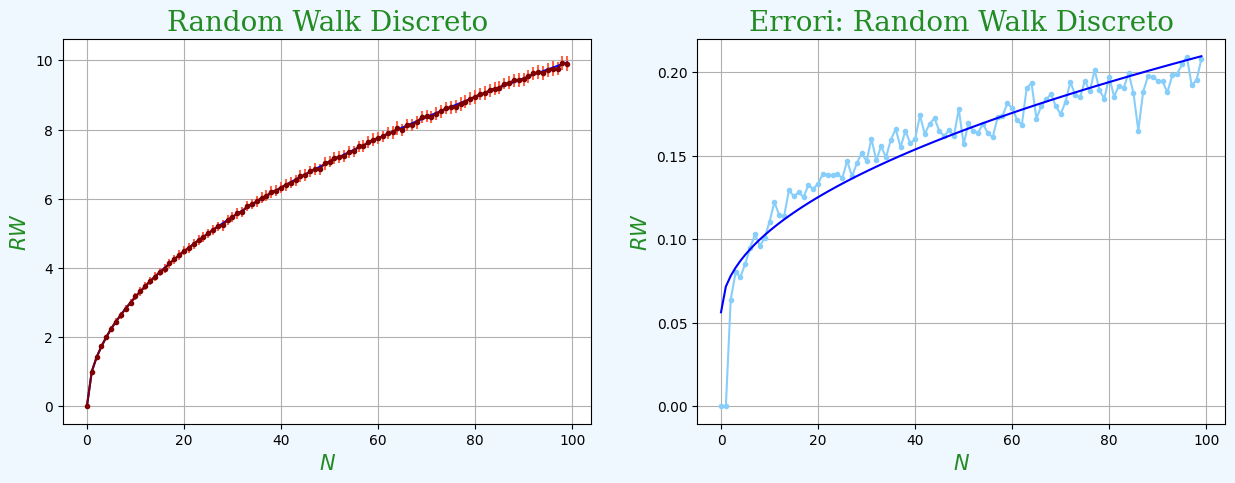

In [43]:

fig, (f1, f2) = plt.subplots(1,2,figsize=(15,5), facecolor ="AliceBlue")

x, y, error = np.loadtxt("EX_2.2_A/rw_discrete.dat", usecols=(0,1,2), delimiter=' ',  unpack='true')
f1.errorbar(x,y,yerr=error,color="Maroon", ecolor ="Tomato", marker = ".")
f1.set_title("Random Walk Discreto", family = "serif", fontsize = "20", color = "ForestGreen")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
f1.set_ylabel("$RW$", fontdict = font)
f1.set_xlabel("$N$", fontdict = font)
popt, pcov = curve_fit(f, x, y)
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
for i in range(0,len(myPar)):
    print(myPar[i]," = ", popt[i])
f1.plot(x, f(x, *popt),color="b")
f1.grid(True)

f2.plot(x,error, color = "LightSkyBlue", marker = ".")
f2.set_title("Errori: Random Walk Discreto", family = "serif", fontsize = "20", color = "ForestGreen")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
f2.set_ylabel("$RW$", fontdict = font)
f2.set_xlabel("$N$", fontdict = font)
popt, pcov = curve_fit(f, x, error)
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
for i in range(0,len(myPar)):
    print(myPar[i]," = ", popt[i])
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
f2.plot(x, f(x, *popt),color="b")
f2.grid(True)
plt.show()

<h3><font color = 'LightGreen'>RW continui </font></h3> 

Fissando invece il passo, ma permettendo al random-walker di transire in maniera isotropa in qualsiasi direzione casuale nello spazio 3D


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

b  =  1.000551172480861
a  =  -0.006896072765889327

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

b  =  0.01587692914222473
a  =  0.0579891645630299

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



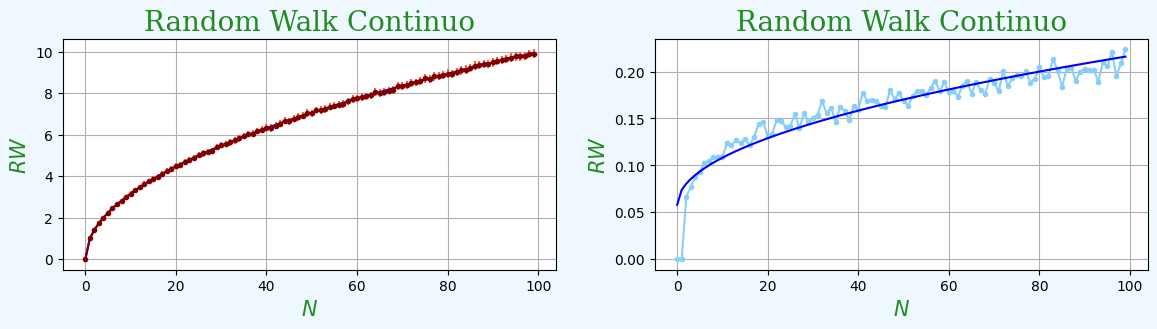

In [45]:
fig, (f1, f2) = plt.subplots(1,2,figsize=(14,3), facecolor = "AliceBlue")

x, y, error = np.loadtxt("EX_2.2_B/rw_continue.dat", usecols=(0,1,2), delimiter=' ',  unpack='true')
f1.errorbar(x,y,yerr=error,color="Maroon", ecolor = "Tomato",marker = ".")
f1.set_title("Random Walk Continuo", family = "serif", fontsize = "20", color = "ForestGreen")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
f1.set_ylabel("$RW$", fontdict = font)
f1.set_xlabel("$N$", fontdict = font)
popt, pcov = curve_fit(f, x, y)
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
for i in range(0,len(myPar)):
    print(myPar[i]," = ", popt[i])
f1.plot(x, f(x, *popt),color="b")
f1.grid(True)

f2.plot(x,error, color = "LightSkyBlue", marker = ".")
f2.set_title("Random Walk Continuo", family = "serif", fontsize = "20", color = "ForestGreen")
font = {"family":"serif", "color":"ForestGreen", "size":"15"}
f2.set_ylabel("$RW$", fontdict = font)
f2.set_xlabel("$N$", fontdict = font)
popt, pcov = curve_fit(f, x, error)
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
for i in range(0,len(myPar)):
    print(myPar[i]," = ", popt[i])
print("")
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("")
f2.plot(x, f(x, *popt),color="b")
f2.grid(True)
plt.show()